In [1]:
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
#matplotlib.rcParams['text.usetex'] = True
from icecream import ic

ic.disable()

# #indir = snakemake.input.indir
# indir = snakemake.params.indir
# outdir = snakemake.params.outdir
# donor =  int(snakemake.params.donor)
# anno_cells_meta_f = snakemake.input.anno_cells_meta_f  #"/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
# # Objective weights. order of the columns
# weights_cfg = snakemake.params.weights_cfg
# objectives_l = snakemake.params.get("objectives_l", 
#                                     ["variants_with_clone_norm_by_1_over_nclones_with_variant", 
#                                      "max_clone_ncells_over_ncells",
#                                      "pct_thresh","other_pct_thresh", 
#                                      "n_vars", "obj_nclones_more_than_one_unique"])
# ncpus = snakemake.params.get('ncpus', 8)
# topn = snakemake.params.get("topn", 16)
indir = snakemake.params.indir
outdir = snakemake.params.outdir
donor =  int(snakemake.params.donor)
anno_cells_meta_f = snakemake.input.anno_cells_meta_f  #"/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
# Objective weights. order of the columns
weights_cfg =  snakemake.params.weights_cfg
objectives_l = snakemake.params.objectives_l
ncpus = snakemake.params.get("ncpus", 8)
topn = snakemake.params.get("topn", 8)
to_test = snakemake.params.get("to_test", False)

# try:
#     indir = snakemake.params.indir
#     outdir = snakemake.params.outdir
#     donor =  int(snakemake.params.donor)
#     anno_cells_meta_f = snakemake.input.anno_cells_meta_f  #"/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
#     # Objective weights. order of the columns
#     weights_cfg =  snakemake.params.weights_cfg
#     objectives_l = snakemake.params.objectives_l
# #     objectives_l = snakemake.params.get("objectives_l", 
# #                                         ["variants_with_clone_norm_by_1_over_nclones_with_variant",
# #                                          "max_clone_ncells_over_nclones", "max_clone_ncells_over_ncells",
# #                                          "pct_thresh","other_pct_thresh", "n_vars", 
# #                                          "obj_nclones_more_than_one_unique"])
#     ncpus = snakemake.params.get(ncpus, 8)
#     topn = snakemake.params.get(topn, 8)
#     to_test = snakemake.params.get("to_test", False)

# except:                                       
#     indir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/"
#     outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/distinct_variants/donor0/scrap/"
#     donor = 0
#     anno_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
#     # pct_thresh = [0.01, 0.1, 0.25, 0.4, 0.5, 0.75, 0.95]
#     # other_pct_thresh = [0.01, 0.1, 0.25, 0.5]
#     # af_thresh = [0, 0.01, 0.1, 0.25, 0.4]

#     # Objective weights. order of the columns
#     #weights = [1,0,0,1,-1, 1, 1] #[1,1,1,1,1] #np.ones([len(objectives),])
#     objectives_l = ["variants_with_clone_norm_by_1_over_nclones_with_variant",
#                  "max_clone_ncells_over_ncells",
#                  "pct_thresh","other_pct_thresh",
#                  "n_vars", "obj_nclones_more_than_one_unique"]
#     weights_cfg = {"standard": [1,1,1,-1, 1, 1], "multivar_clones": [1,1,1,-1, 1, 3], 
#                    "high_unique": [2,1,1,-1, 1, 2], "high_cells": [1,1,2,-1, 1, 1],
#                    "high_pct": [1,1,2,-2, 1, 1]
#                   }

#     ncpus=8
#     topn=8
#     to_test = True


In [2]:

import pandas as pd
import numpy as np
import random
import src.clone_variants_optim  as optim

from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import seaborn as sns
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
from itertools import product

np.set_printoptions(formatter={'float': lambda x: format(x, '.3f')})

# parallel setup
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=ncpus) #, progress_bar=True)


fig_utils from mplh
INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## Setup parameters and save them

In [3]:
objectives = {ind:x for ind,x in enumerate(objectives_l)}
param_names = ["pct_thresh","af_thresh", "other_pct_thresh"]
n_params = 3


pct_thresh = np.arange(0.2, 1, 0.05)
other_pct_thresh = np.arange(0.005, 1, 0.05)
af_thresh = np.arange(0.005, 1, 0.05)

params = {"pct_thresh": pct_thresh,
          "other_pct_thresh": other_pct_thresh,
          "af_thresh": af_thresh,}



# There are 3 params used for calling the clone
full_params = list(product(*list(params.values())))
full_params = pd.DataFrame(full_params, columns=params.keys())

print(full_params.shape)
full_params.head()


(6400, 3)


,pct_thresh,other_pct_thresh,af_thresh
0,0.2,0.005,0.005
1,0.2,0.005,0.055
2,0.2,0.005,0.105
3,0.2,0.005,0.155
4,0.2,0.005,0.205


## Set up the weights and their folders

In [4]:
if not exists(outdir):
    os.mkdir(outdir)

weights_outdirs = {}
for w in weights_cfg:
    weights_outdirs[w] = join(outdir, f"objs_{w}")
    if not exists(weights_outdirs[w]):
        os.mkdir(weights_outdirs[w])

    weights = np.array(weights_cfg[w])

    # save weights and params:
    weights_params_str = "objective, weight"
    for i in zip(objectives_l, weights):
        weights_params_str = weights_params_str + f"{i[0]},{i[1]}\n"
    with open(join(weights_outdirs[w], "obj_weights.txt"), 'w') as f:
        f.write(weights_params_str)

    assert(len(weights)==len(objectives))
    



## Load & preprocess:
- AF df
- DP df
- cells_meta with clone labels. need to create name as donor_lineage

Remove donor variants (>0.9 in 90% of pop)


In [5]:
af_indir = join(indir, "sc_af", f"donor{donor}")

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")

print(AF_df.shape)
print(DP_df.shape)

AF_df.head()

cells_meta = pd.read_csv(join(indir, "cells_meta.tsv"), sep='\t', index_col="ID")#.sort_values(["donor", "lineage"])
cells_meta["name"] = cells_meta["donor"].astype(str)+"_"+cells_meta["lineage"].astype(str)
curr_labels = cells_meta[cells_meta["donor"]==donor]


conditions = curr_labels["condition"].unique()
anno_cells = pd.read_csv(anno_cells_meta_f, sep="\t", index_col=0)


## Get donor inds
donor_inds = AF_df.index[((AF_df>0.9).sum(axis=1)>(0.9*AF_df.shape[1]))]


def rm_high(df, thresh, pct_thresh):
    return df.loc[~(((df>thresh).sum(axis=1)>pct_thresh*df.shape[0]))]

def rm_low(df, thresh, pct_thresh):
    return df.loc[~((df<thresh).sum(axis=1)>(pct_thresh*df.shape[1]))]




(68, 7002)
(68, 7002)


In [6]:
################################################
# Run pipeline 
################################################
if to_test:
    results_df = full_params.sample(32).parallel_apply(
        optim.evaluate_series, args=(AF_df, DP_df, curr_labels, False, objectives_l), axis=1)
else:
    if full_params.shape[0]>=10000:
        results_df = full_params.sample(10000).parallel_apply(optim.evaluate_series, args=(AF_df, DP_df, 
                                                                                           curr_labels, False, objectives_l),
                                                              axis=1)
    else:
        results_df = full_params.parallel_apply(optim.evaluate_series, args=(AF_df, DP_df, curr_labels, False, objectives_l),
                                                axis=1)
    #results_df = full_params.sample(100).parallel_apply(evaluate_series, args=(AF_df, DP_df, curr_labels), axis=1)

#print(results_df.head())
print((results_df>0).any())
drop_inds = results_df.loc[(results_df==0).all(axis=1)].index
results_df = results_df.loc[(~(results_df==0).all(axis=1))]
full_params = full_params.loc[results_df.index]
results_df.to_csv(join(outdir, "objectives.csv"))
full_params.to_csv(join(outdir, "raw_params.csv"))

results_norm = optim.norm_results(results_df)
results_norm.head()


variants_with_clone_norm_by_1_over_nclones_with_variant     True
max_clone_ncells_over_ncells                                True
pct_thresh                                                  True
other_pct_thresh                                            True
n_vars                                                      True
obj_nclones_more_than_one_unique                           False
dtype: bool
objs_total variants_with_clone_norm_by_1_over_nclones_with_variant     96.237246
max_clone_ncells_over_ncells                               102.879914
pct_thresh                                                  20.500000
other_pct_thresh                                            14.760000
n_vars                                                     125.000000
dtype: float64


,variants_with_clone_norm_by_1_over_nclones_with_variant,max_clone_ncells_over_ncells,pct_thresh,other_pct_thresh,n_vars,obj_nclones_more_than_one_unique
5437,0.002078,0.002982,0.041463,0.037602,0.008,NaN
5799,0.015586,0.015269,0.043902,0.030827,0.016,NaN
5643,0.031173,0.029160,0.043902,0.007114,0.024,NaN
1522,0.094261,0.095238,0.017073,0.054539,0.096,NaN
4440,0.114301,0.111590,0.036585,0.007114,0.112,NaN


## For each weights config get objective scores and save

w standard
weights [1, 1, 1, -1, 1, 1]
Plotting top objective results
param id 4440
param id 2241
param id 1522
param id 5643
param id 3625
param id 6184
param id 2834
param id 2826
w multivar_clones
weights [1, 1, 1, -1, 1, 3]
Plotting top objective results
param id 4440
param id 2241
param id 1522
param id 5643
param id 3625
param id 6184
param id 2834
param id 2826
w high_unique
weights [2, 1, 1, -1, 1, 2]
Plotting top objective results
param id 4440
param id 2241
param id 1522
param id 5643
param id 3625
param id 6184
param id 2834
param id 2826
w high_cells
weights [1, 1, 2, -1, 1, 1]
Plotting top objective results
param id 4440
param id 2241
param id 1522
param id 5643
param id 6184
param id 3625
param id 4110
param id 2834
w high_pct
weights [1, 1, 2, -2, 1, 1]
Plotting top objective results
param id 4440
param id 2241
param id 1522
param id 5643
param id 3625
param id 2834
param id 2826
param id 6184


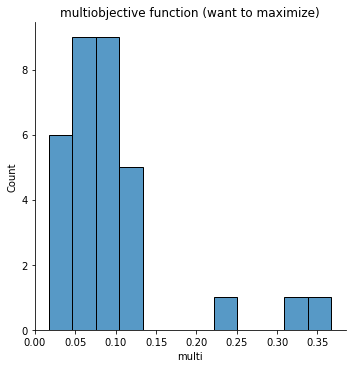

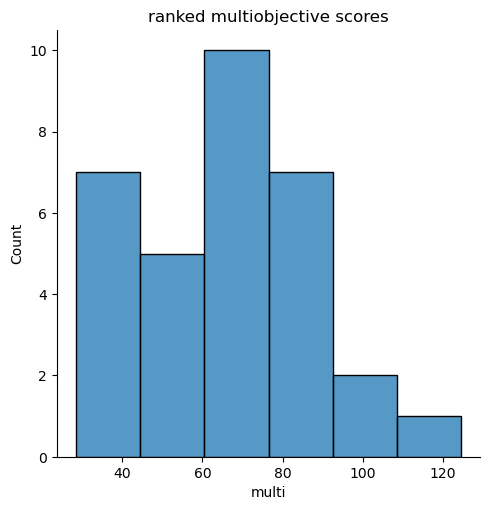

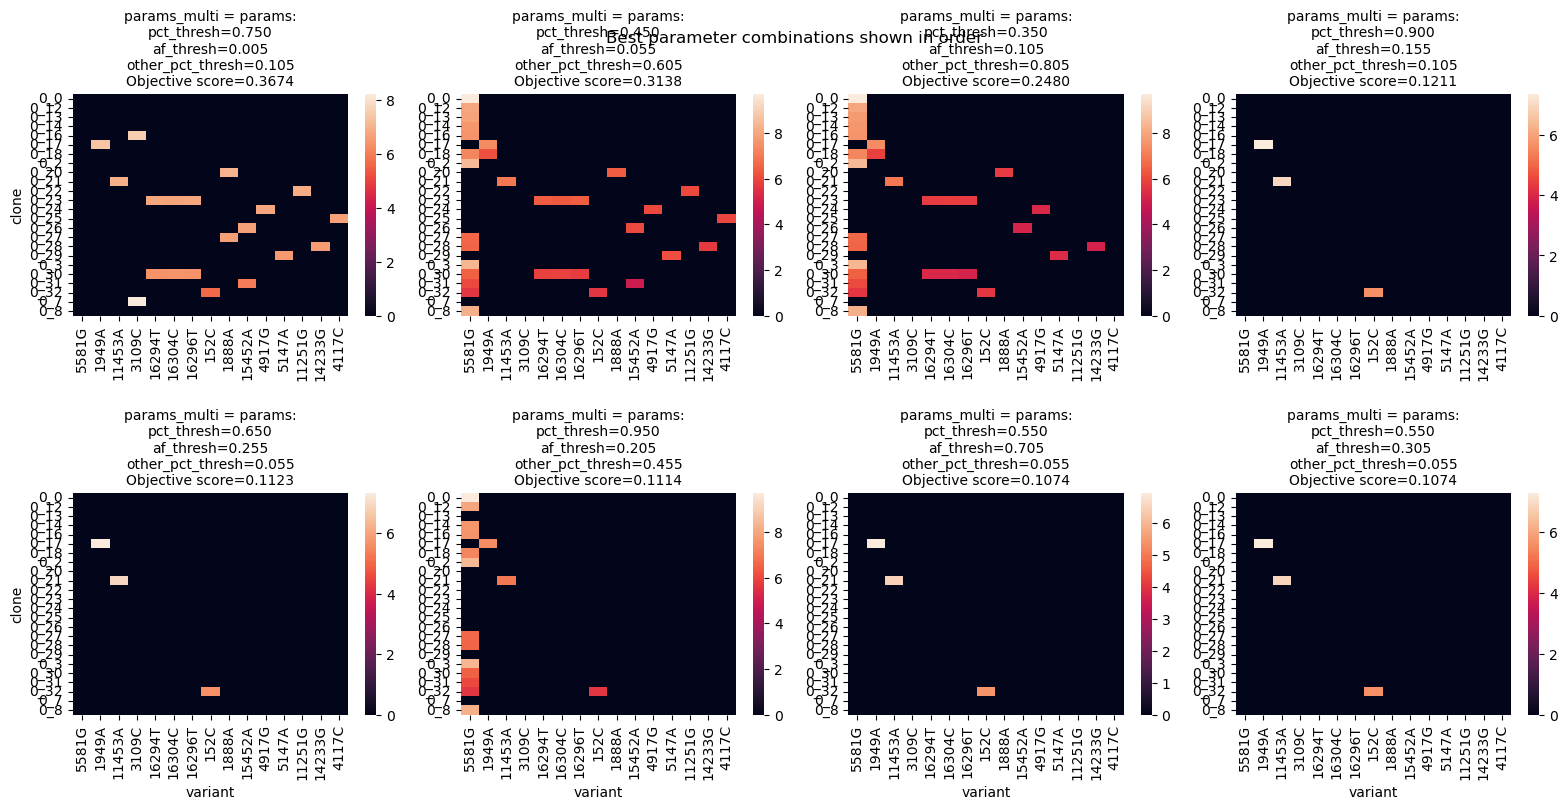

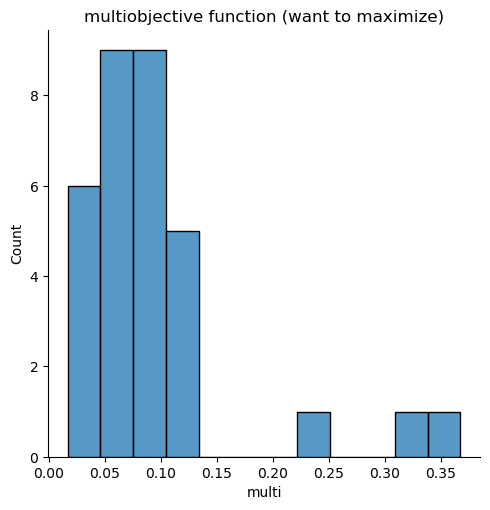

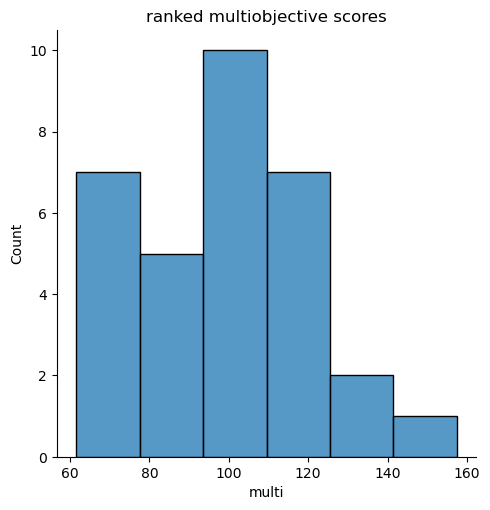

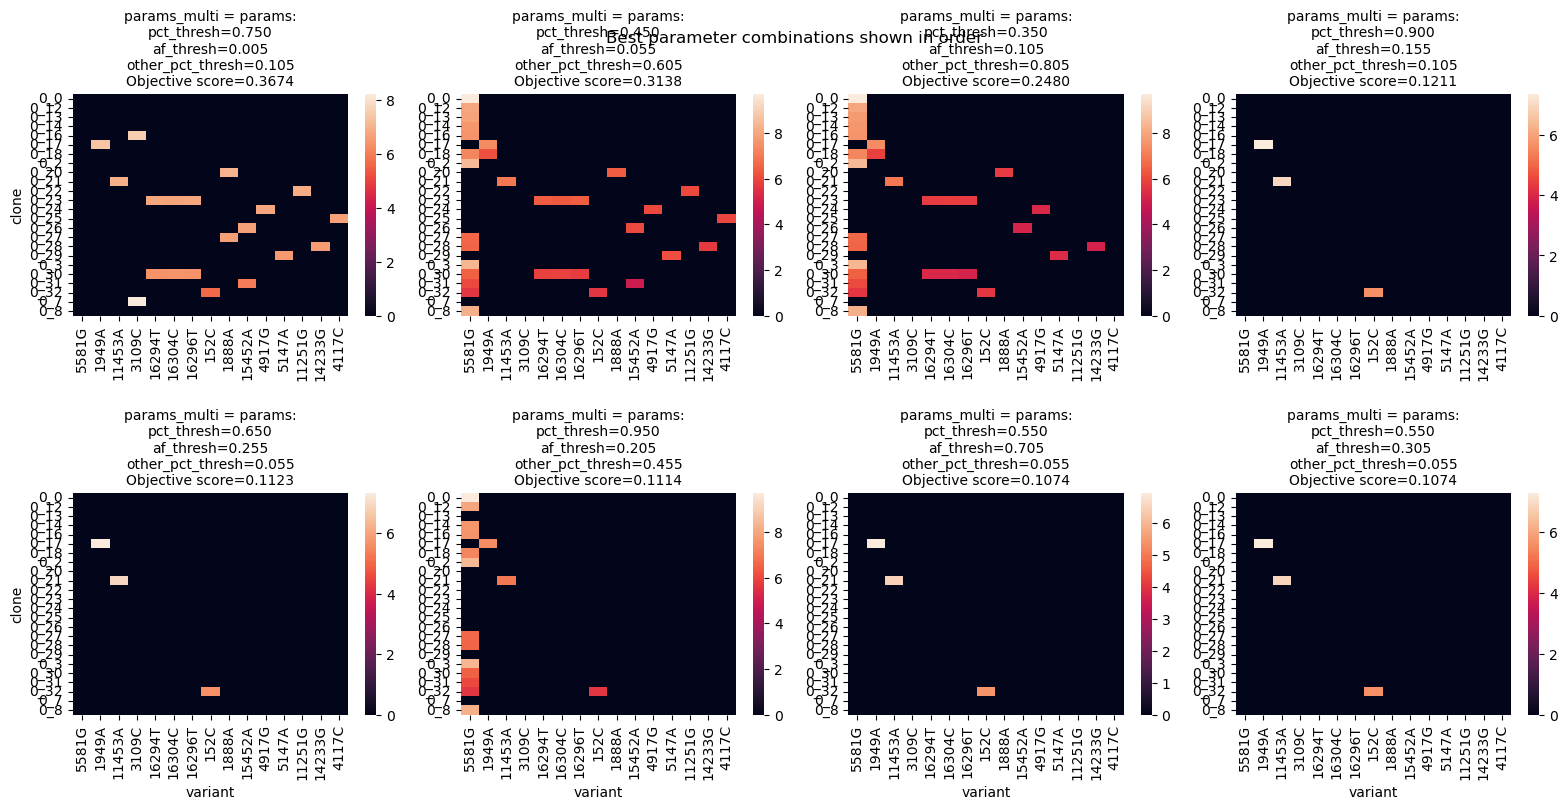

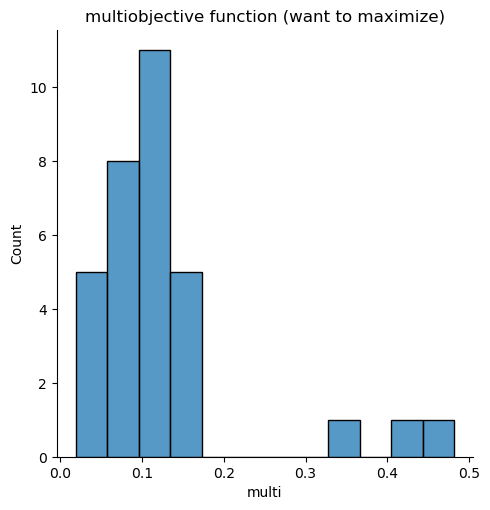

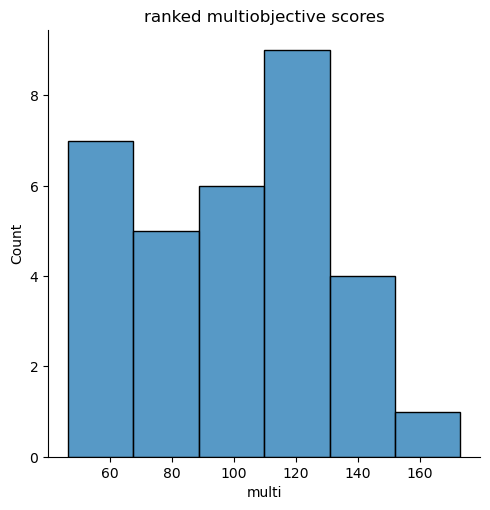

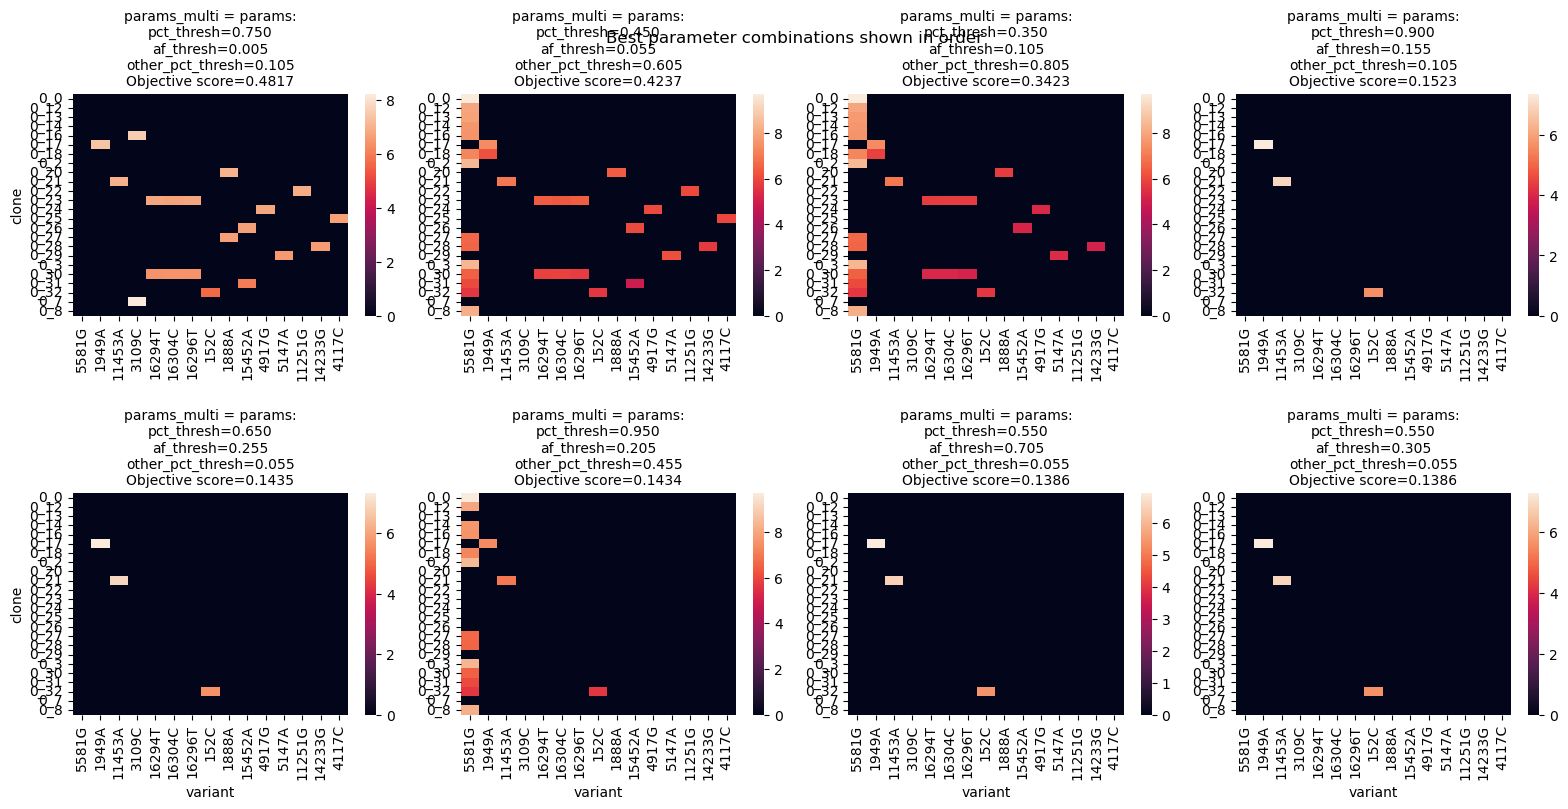

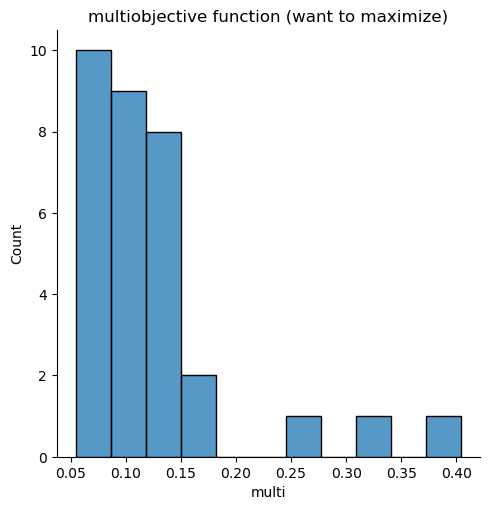

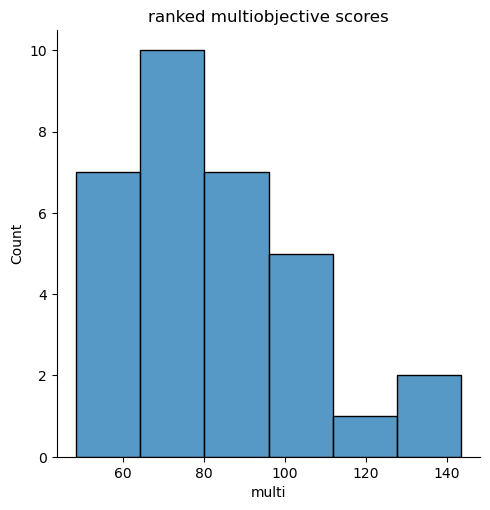

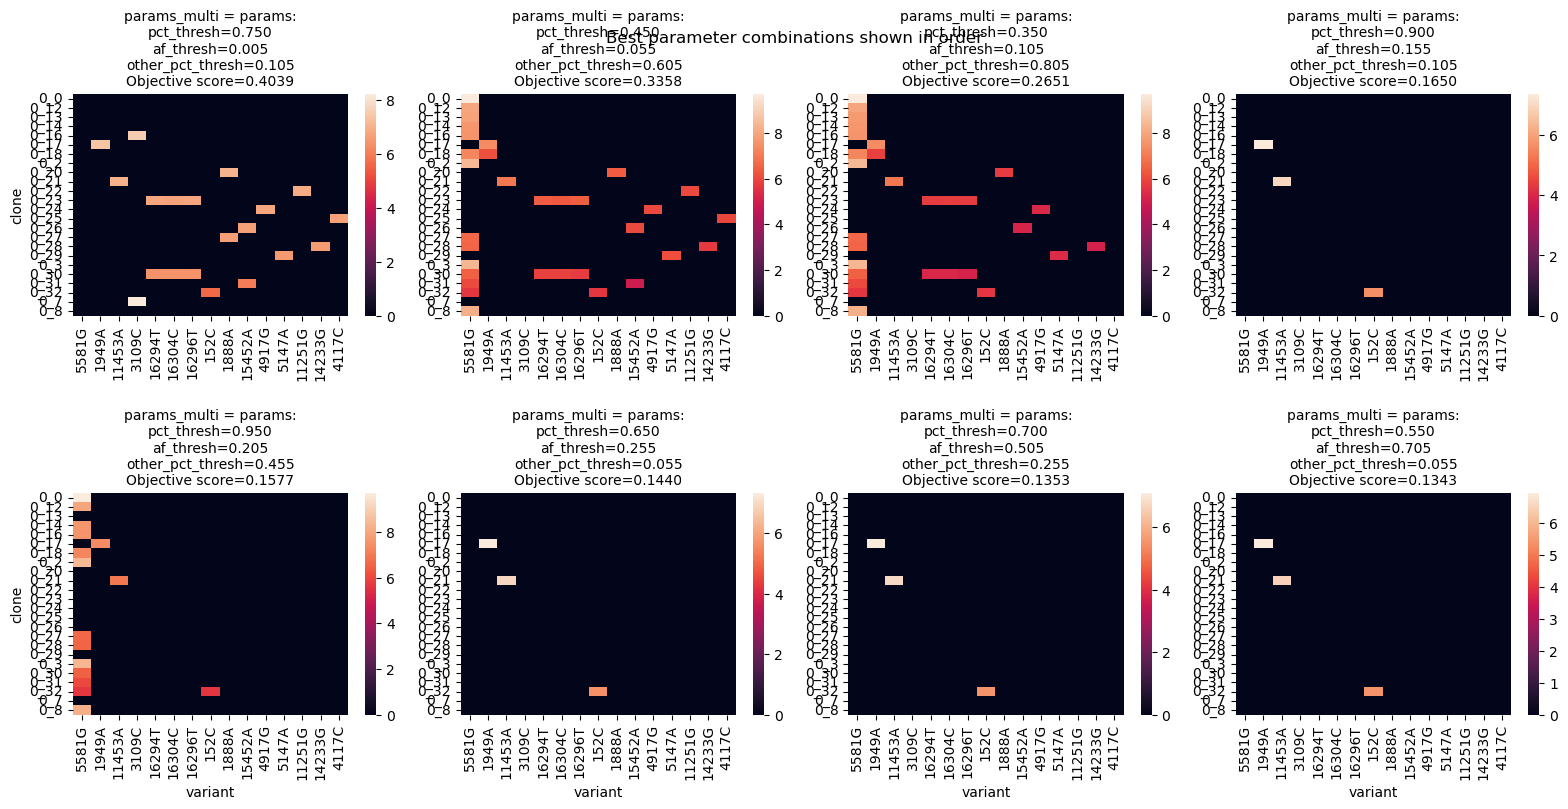

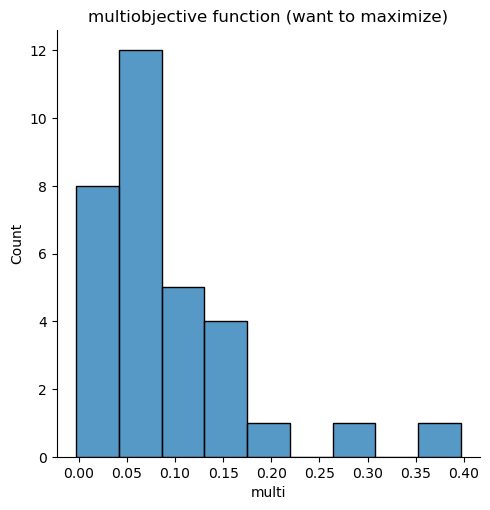

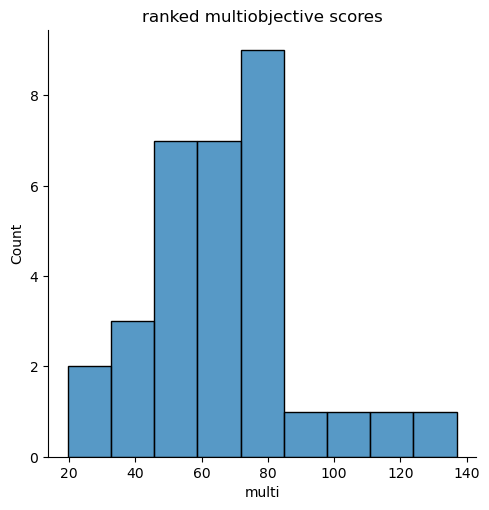

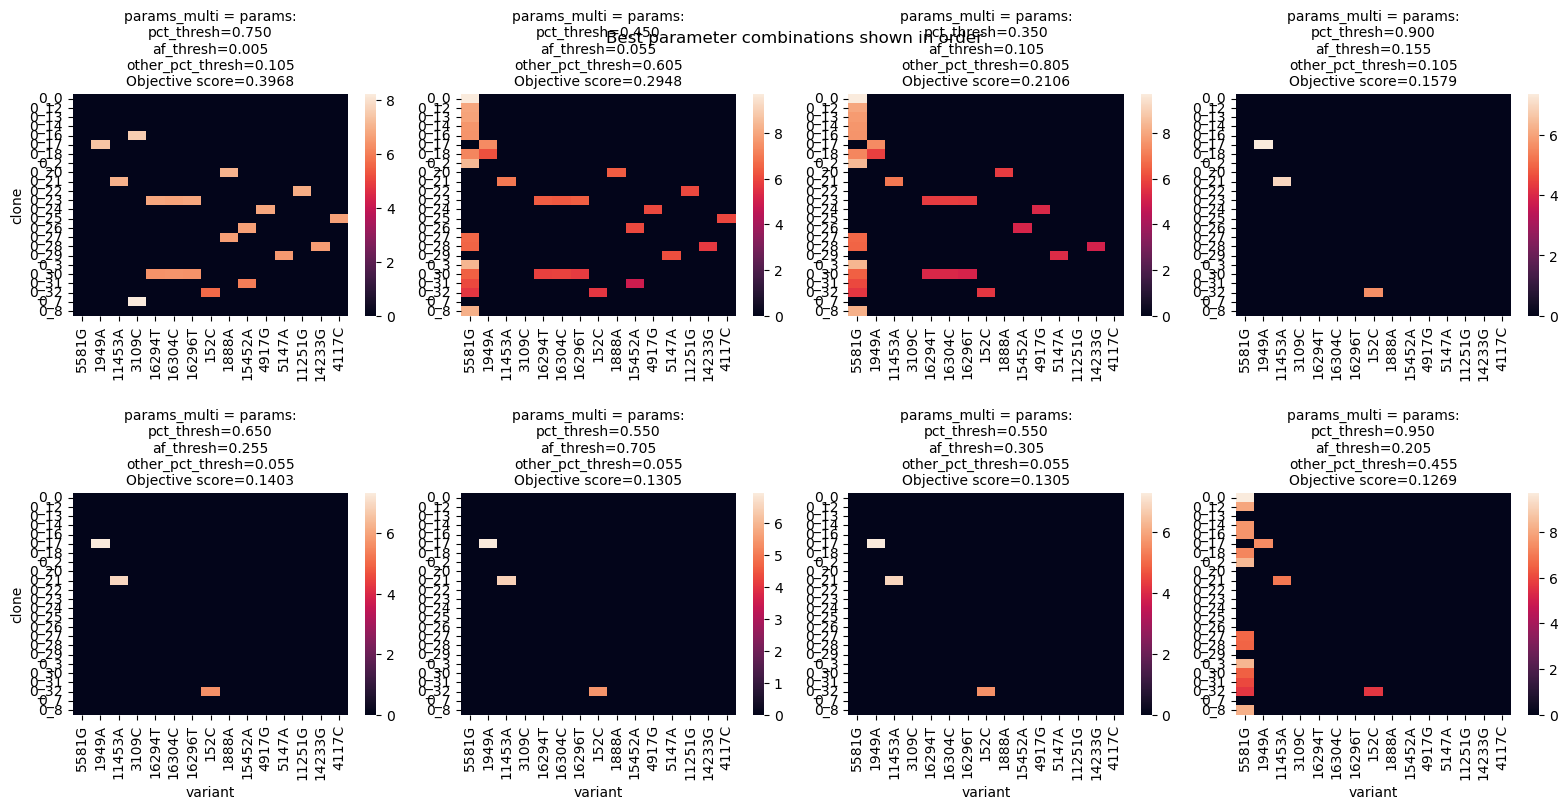

In [7]:
for w in weights_cfg:
    print("w", w)
    curr_outdir = weights_outdirs[w]
    if not exists(curr_outdir):
        os.mkdir(curr_outdir)
    weights = weights_cfg[w]
    print('weights', weights)
    curr_results_norm = optim.set_multi(results_norm.copy(), weights, to_norm_results=False)
    rank_df = optim.set_multi_rank(curr_results_norm, weights)

    drop_results = curr_results_norm.loc[curr_results_norm["multi"].isnull()]
    curr_results_norm = curr_results_norm.loc[~(curr_results_norm["multi"].isnull())]
    if len(curr_results_norm) == 0:
        raise ValueError("No param retrieved variants")

    ########################
    ## Save the objective results
    ########################
    curr_results_norm.to_csv(join(curr_outdir, "objectives_norm.csv"))
    rank_df.to_csv(join(curr_outdir, "objectives_rank.csv"))
    #curr_results_norm.loc[curr_results_norm["multi"] == np.nan]
    full_params.to_csv(join(curr_outdir, "params.csv"))

    
    ########################
    # Plot distribution results
    ########################
    sns.displot(curr_results_norm["multi"])
    plt.title("multiobjective function (want to maximize)")
    plt.savefig(join(curr_outdir, "loss_multi.pdf"))

    
    sns.displot(rank_df["multi"])
    plt.title("ranked multiobjective scores")
    #sns.pairplot(rank_df)



    ########################
    # Get the top n results
    ########################
    filt_rank, filt_results = optim.get_top_n_results(curr_results_norm, rank_df, n=topn)
    filt_results.columns = [f"{x}_obj" for x in filt_results.columns]
    filt_results = pd.merge(filt_results, full_params, left_index=True, right_index=True, how="left")
    filt_rank = filt_rank.loc[filt_results.index]

    all_df = []
    all_objs = {}
    print("Plotting top objective results")
    for ind, val in filt_results.iterrows():
        print(f"param id {ind}")
        obj_out, data = optim.evaluate_series(val, AF_df, DP_df, curr_labels, return_data=True, objectives_l=objectives_l)
        all_df.append(data["all_unique_df"])
        all_objs[ind] = obj_out
    all_df = pd.concat(all_df)

    heatmap_input = all_df[["n_cells", "variant"]].reset_index().pivot(index="id", columns="variant", values="n_cells").fillna(0).astype(int)
    meta_df = all_df[["af_thresh", "other_pct_thresh", "pct_thresh", "clone"]]
    meta_df = meta_df.loc[~(meta_df.index.duplicated())]
    meta_df = meta_df.sort_values(["af_thresh","pct_thresh", "other_pct_thresh", "clone"])
    heatmap_input = heatmap_input.loc[meta_df.index]

    # Get the variants based on total number of cells across parameters
    heatmap_input = heatmap_input.loc[:,heatmap_input.sum().sort_values()[::-1].index]
    variants_order = heatmap_input.columns

    clone_sums = meta_df.groupby("clone").apply(optim.clone_sum, heatmap_input)
    clone_sums = clone_sums.loc[:, clone_sums.sum().sort_values()[::-1].index]
    clones_order = clone_sums.index

    all_df["params"] = all_df.apply(optim.params_to_str, axis=1, args=(param_names,))
    filt_results["params"] = filt_results.apply(optim.params_to_str, axis=1, args=(param_names,))
    filt_results["params_multi"] = filt_results.apply(optim.params_and_multi_str, axis=1)
    tmp = filt_results.set_index("params")
    all_df["multi_obj"] = all_df.apply(lambda x: tmp.loc[x["params"], "multi_obj"], axis=1)
    del tmp


    all_df["params_multi"] = all_df.apply(optim.params_and_multi_str, axis=1)


    fg = sns.FacetGrid(data=all_df.reset_index(), height=4, sharey=False, sharex=False,
                       col="params_multi", col_wrap=4, col_order=filt_results["params_multi"].values, margin_titles=True)

    fg.map_dataframe(optim.draw_heatmap, 'variant','clone', 'log2_n_cells',
                     clones_order=clones_order, variants_order=variants_order)#, cbar=False)

    #fg.set_titles(row_template = 'other_pct_thresh: {row_name}', col_template = 'pct_thresh: {col_name}')
    fg.fig.suptitle(f"Best parameter combinations shown in order")
    fg.fig.subplots_adjust(top=0.9, hspace = 0.8)

    plt.savefig(join(curr_outdir, "top_param_results.pdf"), dpi=300)
    plt.savefig(join(curr_outdir, "top_param_results.svg"), dpi=300)


